In [1]:
%load_ext autoreload
%autoreload 2

# Intro to 4D-STEM data: bin and crop

Here we perform only the simplest preprocessing to reduce the data size, binning and cropping



### Acknowledgements

This tutorial was created by the py4DSTEM instructor team:
- Ben Savitzky (bhsavitzky@lbl.gov)
- Steve Zeltmann (steven.zeltmann@berkeley.edu)
- Stephanie Ribet (sribet@u.northwestern.edu)
- Alex Rakowski (arakowski@lbl.gov)
- Colin Ophus (clophus@lbl.gov)


Updated 11/3/2022

## Set up the environment

In [2]:
import py4DSTEM
from py4DSTEM.visualize import show
py4DSTEM.__version__

'0.14.0'

---
# Download the tutorial data <a class="anchor" id="part_00"></a>

You can download the tutorial dataset here: (501 megabytes)
* [Simulated single crystal and polycrystalline gold](https://drive.google.com/file/d/1PmbCYosA1eYydWmmZebvf6uon9k_5g_S/view?usp=sharing)

# Load data

In [3]:
# Set the filepath

from os.path import splitext

filepath_data = "/Users/Ben/work/data/py4DSTEM_sampleData/calibration_simulatedAuNanoplatelet/data_binned.h5"

In [4]:
# Load the datacube

datacube = py4DSTEM.read(
    filepath_data,
    data_id = 'polyAu_4DSTEM'
)

datacube

DataCube( A 4-dimensional array of shape (100, 84, 125, 125) called 'polyAu_4DSTEM',
          with dimensions:

          Rx = [0,1,...] pixels
          Ry = [0,1,...] pixels
          Qx = [0,1,...] pixels
          Qy = [0,1,...] pixels
)

# Bin

In [5]:
datacube.dim(0)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [6]:
datacube.set_scan_shape((100,84))

DataCube( A 4-dimensional array of shape (100, 84, 125, 125) called 'polyAu_4DSTEM',
          with dimensions:

          Rx = [0,1,...] pixels
          Ry = [0,1,...] pixels
          Qx = [0,1,...] pixels
          Qy = [0,1,...] pixels
)

In [7]:
datacube.shape

(100, 84, 125, 125)

In [8]:
datacube.crop_R((0,25,0,30))

DataCube( A 4-dimensional array of shape (25, 30, 125, 125) called 'polyAu_4DSTEM',
          with dimensions:

          Rx = [0,1,...] pixels
          Ry = [0,1,...] pixels
          Qx = [0,1,...] pixels
          Qy = [0,1,...] pixels
)

In [9]:
datacube.dim(0)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [10]:
datacube.calibration.set_R_pixel_size(5)
datacube.calibration.set_R_pixel_units('nm')

datacube.calibration.set_Q_pixel_size(0.032)
datacube.calibration.set_Q_pixel_units('A^-1')

In [11]:
datacube.crop_Q((1,122,2,121))

DataCube( A 4-dimensional array of shape (25, 30, 121, 119) called 'polyAu_4DSTEM',
          with dimensions:

          Rx = [0,5,...] nm
          Ry = [0,5,...] nm
          Qx = [0.0,0.032,...] A^-1
          Qy = [0.0,0.032,...] A^-1
)

In [12]:
datacube.dims

(array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145]),
 array([0.   , 0.032, 0.064, 0.096, 0.128, 0.16 , 0.192, 0.224, 0.256,
        0.288, 0.32 , 0.352, 0.384, 0.416, 0.448, 0.48 , 0.512, 0.544,
        0.576, 0.608, 0.64 , 0.672, 0.704, 0.736, 0.768, 0.8  , 0.832,
        0.864, 0.896, 0.928, 0.96 , 0.992, 1.024, 1.056, 1.088, 1.12 ,
        1.152, 1.184, 1.216, 1.248, 1.28 , 1.312, 1.344, 1.376, 1.408,
        1.44 , 1.472, 1.504, 1.536, 1.568, 1.6  , 1.632, 1.664, 1.696,
        1.728, 1.76 , 1.792, 1.824, 1.856, 1.888, 1.92 , 1.952, 1.984,
        2.016, 2.048, 2.08 , 2.112, 2.144, 2.176, 2.208, 2.24 , 2.272,
        2.304, 2.336, 2.368, 2.4  , 2.432, 2.464, 2.496, 2.528, 2.56 ,
        2.592, 2.624, 2.656, 2.688, 2.72 ,

In [13]:
datacube.calibration.get_Q_pixel_size()

0.032

In [14]:
datacube.bin_Q(3)

DataCube( A 4-dimensional array of shape (25, 30, 40, 39) called 'polyAu_4DSTEM',
          with dimensions:

          Rx = [0,5,...] nm
          Ry = [0,5,...] nm
          Qx = [0.0,0.096,...] A^-1
          Qy = [0.0,0.096,...] A^-1
)

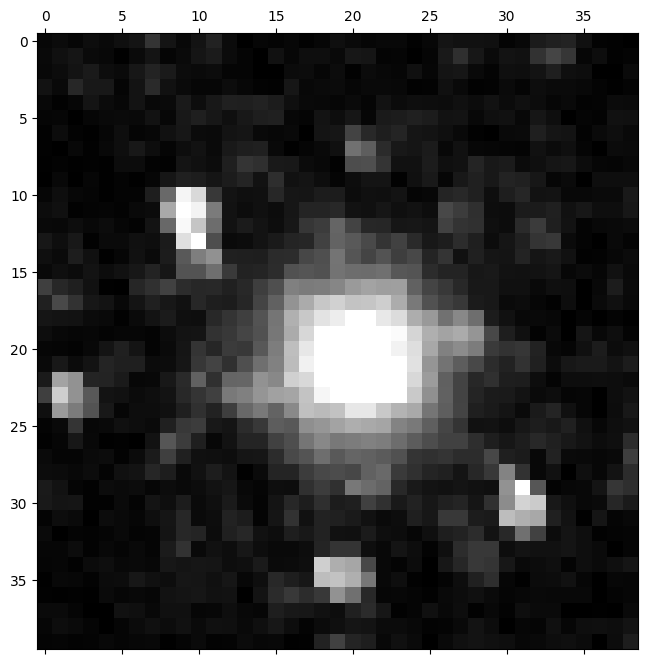

In [15]:
py4DSTEM.show(datacube[2,3])

In [16]:
datacube.dims

(array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145]),
 array([0.   , 0.096, 0.192, 0.288, 0.384, 0.48 , 0.576, 0.672, 0.768,
        0.864, 0.96 , 1.056, 1.152, 1.248, 1.344, 1.44 , 1.536, 1.632,
        1.728, 1.824, 1.92 , 2.016, 2.112, 2.208, 2.304, 2.4  , 2.496,
        2.592, 2.688, 2.784, 2.88 , 2.976, 3.072, 3.168, 3.264, 3.36 ,
        3.456, 3.552, 3.648, 3.744]),
 array([0.   , 0.096, 0.192, 0.288, 0.384, 0.48 , 0.576, 0.672, 0.768,
        0.864, 0.96 , 1.056, 1.152, 1.248, 1.344, 1.44 , 1.536, 1.632,
        1.728, 1.824, 1.92 , 2.016, 2.112, 2.208, 2.304, 2.4  , 2.496,
        2.592, 2.688, 2.784, 2.88 , 2.976, 3.072, 3.168, 3.264, 3.36 ,
        3.456, 3.552, 3.648]))

In [17]:
datacube.calibration.get_Q_pixel_size()

0.096

# Write and read

In [18]:
# set a filepath

filepath = splitext(filepath_data)[0] + '_analysis_basics_00.h5'

In [19]:
# inspect what's in the data tree

datacube.tree()

/


In [20]:
# save

py4DSTEM.save(
    filepath,
    datacube,
    mode = 'o'
)

In [21]:
# inspect the resulting HDF5 file

py4DSTEM.print_h5_tree(filepath)

/
|---polyAu_4DSTEM
    |---polyAu_4DSTEM




In [22]:
# read

d = py4DSTEM.read(
    filepath,
)

In [23]:
d

DataCube( A 4-dimensional array of shape (25, 30, 40, 39) called 'polyAu_4DSTEM',
          with dimensions:

          Rx = [0,5,...] nm
          Ry = [0,5,...] nm
          Qx = [0.0,0.096,...] A^-1
          Qy = [0.0,0.096,...] A^-1
)

In [24]:
d.dims

(array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145]),
 array([0.   , 0.096, 0.192, 0.288, 0.384, 0.48 , 0.576, 0.672, 0.768,
        0.864, 0.96 , 1.056, 1.152, 1.248, 1.344, 1.44 , 1.536, 1.632,
        1.728, 1.824, 1.92 , 2.016, 2.112, 2.208, 2.304, 2.4  , 2.496,
        2.592, 2.688, 2.784, 2.88 , 2.976, 3.072, 3.168, 3.264, 3.36 ,
        3.456, 3.552, 3.648, 3.744]),
 array([0.   , 0.096, 0.192, 0.288, 0.384, 0.48 , 0.576, 0.672, 0.768,
        0.864, 0.96 , 1.056, 1.152, 1.248, 1.344, 1.44 , 1.536, 1.632,
        1.728, 1.824, 1.92 , 2.016, 2.112, 2.208, 2.304, 2.4  , 2.496,
        2.592, 2.688, 2.784, 2.88 , 2.976, 3.072, 3.168, 3.264, 3.36 ,
        3.456, 3.552, 3.648]))

In [25]:
d.calibration

Calibration( A Metadata instance called 'calibration', containing the following fields:

             Q_pixel_size:    0.096
             R_pixel_size:    5
             Q_pixel_units:   A^-1
             R_pixel_units:   nm
)